# Prediction Model of the Energy Consumption in France

## Libraries

In [11]:
# pip install xgboost

     |████████████████████████████████| 1.8 MB 2.8 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [1]:
# Importing libraries :
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

import xgboost as xgb
from sklearn.metrics import mean_squared_error
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

## Importing the data and fixing some data types

In [2]:
# Importing dataset :

df = pd.read_csv('/Users/adel/Desktop/Final-Project---IronHack-Paris/MySQL/Mysql Extracts/merged_dataset_final.csv')
df.head()

,Datetime,date,Year,Month,Day,Hour,Weekday,Consumption (MW),Fuel oil (MW),Coal (MW),...,CO2 emissions intensity (g/kWh),Trading with England (MW),Trading with Spain (MW),Trading with Italy (MW),Trading with Switzerland (MW),Trading with Germany-Belgium (MW),Flag Holiday,Average temperature (°C),Reference temperature (°C),Temperature Deviation (°C)
0,2012-01-01 00:00:00,2012-01-01,2012,1,1,0,6,58315,492,25,...,33,-1750,-1200,-862,-2625,-2940,1,11.7,4.6,7.1
1,2012-01-01 00:30:00,2012-01-01,2012,1,1,0,6,58315,492,25,...,33,-1750,-1200,-862,-2625,-2940,1,11.7,4.6,7.1
2,2012-01-01 01:00:00,2012-01-01,2012,1,1,1,6,56231,492,25,...,34,-1750,-1400,-862,-2625,-2714,1,11.7,4.6,7.1
3,2012-01-01 01:30:00,2012-01-01,2012,1,1,1,6,56075,491,25,...,35,-1750,-1400,-862,-2625,-2714,1,11.7,4.6,7.1
4,2012-01-01 02:00:00,2012-01-01,2012,1,1,2,6,55532,492,25,...,35,-1750,-1400,-862,-2327,-1088,1,11.7,4.6,7.1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182592 entries, 0 to 182591
Data columns (total 28 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Datetime                           182592 non-null  object 
 1   date                               182592 non-null  object 
 2   Year                               182592 non-null  int64  
 3   Month                              182592 non-null  int64  
 4   Day                                182592 non-null  int64  
 5   Hour                               182592 non-null  int64  
 6   Weekday                            182592 non-null  int64  
 7   Consumption (MW)                   182592 non-null  int64  
 8   Fuel oil (MW)                      182592 non-null  int64  
 9   Coal (MW)                          182592 non-null  int64  
 10  Gas (MW)                           182592 non-null  int64  
 11  Nuclear (MW)                       1825

In [4]:
# Converting datetime column to datetime and date column to date :

df['Datetime'] = pd.to_datetime(df['Datetime'])
df['date'] = pd.to_datetime(df['date'])

In [5]:
df.shape

(182592, 28)

In [6]:
# Checking the time range of the dataset :

print('The dataset starts from {} and ends at {}'.format(df['Datetime'].min(), df['Datetime'].max()))

The dataset starts from 2012-01-01 00:00:00 and ends at 2022-05-31 23:30:00


In [7]:
# Putting datetime as index :

df = df.set_index('Datetime')
df.head()

,date,Year,Month,Day,Hour,Weekday,Consumption (MW),Fuel oil (MW),Coal (MW),Gas (MW),...,CO2 emissions intensity (g/kWh),Trading with England (MW),Trading with Spain (MW),Trading with Italy (MW),Trading with Switzerland (MW),Trading with Germany-Belgium (MW),Flag Holiday,Average temperature (°C),Reference temperature (°C),Temperature Deviation (°C)
Datetime,,,,,,,,,,,,,,,,,,,,,
2012-01-01 00:00:00,2012-01-01,2012,1,1,0,6,58315,492,25,3816,...,33,-1750,-1200,-862,-2625,-2940,1,11.7,4.6,7.1
2012-01-01 00:30:00,2012-01-01,2012,1,1,0,6,58315,492,25,3816,...,33,-1750,-1200,-862,-2625,-2940,1,11.7,4.6,7.1
2012-01-01 01:00:00,2012-01-01,2012,1,1,1,6,56231,492,25,3834,...,34,-1750,-1400,-862,-2625,-2714,1,11.7,4.6,7.1
2012-01-01 01:30:00,2012-01-01,2012,1,1,1,6,56075,491,25,3832,...,35,-1750,-1400,-862,-2625,-2714,1,11.7,4.6,7.1
2012-01-01 02:00:00,2012-01-01,2012,1,1,2,6,55532,492,25,3839,...,35,-1750,-1400,-862,-2327,-1088,1,11.7,4.6,7.1


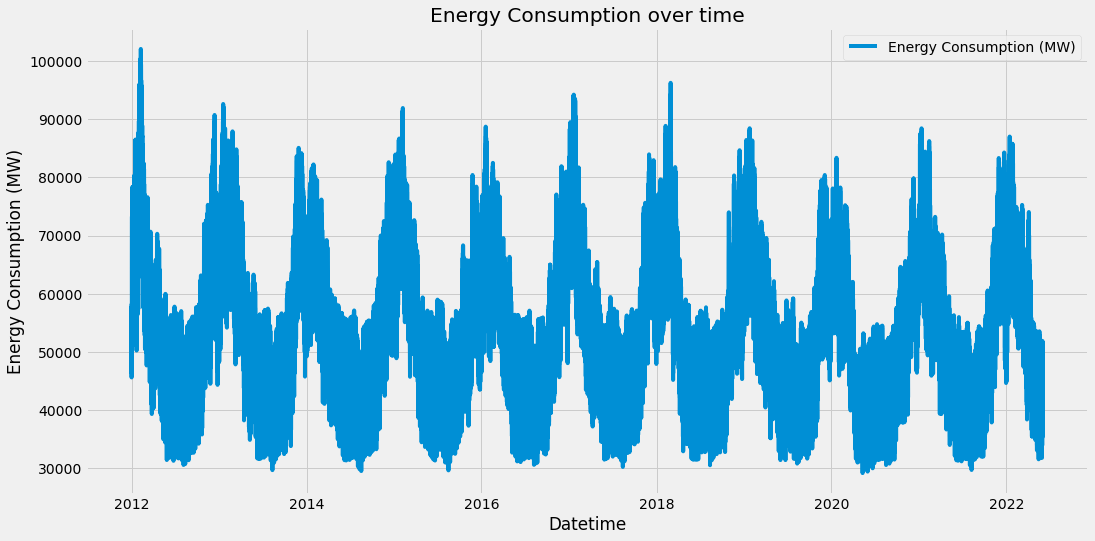

In [10]:
# Plotting the energy consumption over datetime :

plt.figure(figsize=(16,8))
plt.plot(df['Consumption (MW)'], label='Energy Consumption (MW)')
plt.title('Energy Consumption over time')
plt.xlabel('Datetime')
plt.ylabel('Energy Consumption (MW)')
plt.legend(loc='best')
plt.show()

We can see that there is an seasonal pattern.

## Train & Test Split

In [13]:
# The dataset starts from 2012-01-01 00:00:00 and ends at 2022-05-31 23:30:00. 
# So we are going to take the data from 2012-01-01 to 2020-01-01 for training set and from 2020-01-01 to 2022-05-31 for test set.
# Train and test split :
train = df.loc[df.index < '2020-01-01']
test = df.loc[df.index >= '2020-01-01']

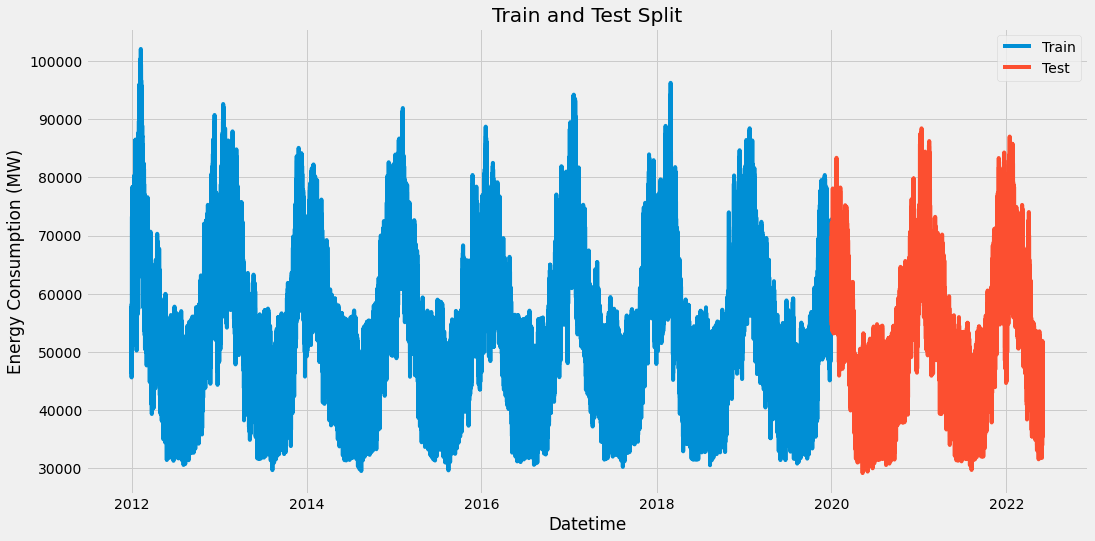

In [25]:
# Plotting the train and test split :
plt.figure(figsize=(16,8))
plt.plot(train['Consumption (MW)'], label='Train')
plt.plot(test['Consumption (MW)'], label='Test')
plt.title('Train and Test Split')
plt.xlabel('Datetime')
plt.ylabel('Energy Consumption (MW)')
plt.legend(loc='best')
plt.show()

## ARIMA MODEL TEST

In [19]:
# Creating a copy of df in a new dataframe called data :
data = df.copy()

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima.model import ARIMA

In [21]:
# Split the data into training and testing sets
train_size = int(len(data) * 0.8)
train_data, test_data = data[:train_size], data[train_size:]

# Choose a time series model and train it on the training set
model = ARIMA(train_data['Consumption (MW)'], order=(1, 1, 1))
fitted_model = model.fit()

In [22]:

# Evaluate the performance of the model on the testing set
test_predictions = fitted_model.predict(start=len(train_data), end=len(data)-1, typ='levels')
test_rmse = np.sqrt(np.mean((test_predictions - test_data['Consumption (MW)']) ** 2))
print('Test RMSE:', test_rmse)

Test RMSE: 21965.495186695098


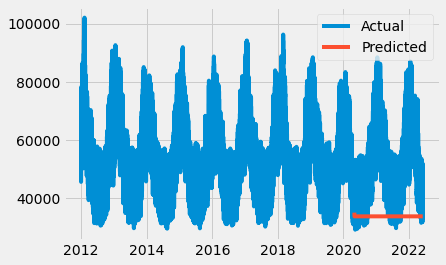

In [24]:
# Visualize the results
plt.plot(data['Consumption (MW)'], label='Actual')
plt.plot(test_data.index, test_predictions, label='Predicted')
plt.legend()
plt.show()